# (MBTI) Myers-Briggs Personality Type Prediction

The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axis:

* Introversion (I) – Extroversion (E)
* Intuition (N) – Sensing (S)
* Thinking (T) – Feeling (F)
* Judging (J) – Perceiving (P)


So for example, someone who prefers introversion, intuition, thinking and perceiving would be labelled an INTP in the MBTI system, and there are lots of personality based components that would model or describe this person’s preferences or behaviour based on the label.

It is one of, if not the, the most popular personality test in the world. It is used in businesses, online, for fun, for research and lots more. A simple google search reveals all of the different ways the test has been used over time. It’s safe to say that this test is still very relevant in the world in terms of its use.

From scientific or psychological perspective it is based on the work done on cognitive functions by Carl Jung i.e. Jungian Typology. This was a model of 8 distinct functions, thought processes or ways of thinking that were suggested to be present in the mind. Later this work was transformed into several different personality systems to make it more accessible, the most popular of which is of course the MBTI.

Recently, its use/validity has come into question because of unreliability in experiments surrounding it, among other reasons. But it is still clung to as being a very useful tool in a lot of areas, and the purpose of this dataset is to help see if any patterns can be detected in specific types and their style of writing, which overall explores the validity of the test in analysing, predicting or categorising behaviour.

Content:<br>
This dataset contains over 8600 rows of data, on each row is a person’s:
* Type (This persons 4 letter MBTI code/type)
* A section of each of the last 50 things they have posted (Each entry separated by "|||" (3 pipe characters))

## DATA CLEANING & LEMMITIZING

In [1]:
# importing dependencies here
import numpy as np
import pandas as pd
import os
import csv
csv.field_size_limit(1_000_000)

# for splitting data into training and holdout dataset
from sklearn.model_selection import train_test_split

# visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# cleaning and dropping stop words
import re
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")
nltk.download("wordnet")

# lemmitizing
from nltk.stem import WordNetLemmatizer

# performance check
import time

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gulev\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gulev\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# reading the dataset
df = pd.read_csv(os.path.join("..", "data", "texts_learn.csv"), encoding='utf-8')

# splitting data into training and holdout dataset
personality_data, df_holdout = train_test_split(
    df, random_state=42, test_size=0.01, stratify=df["type"]
)

# saving the training and holdout datasets
personality_data.to_csv(os.path.join("..", "data", "personality_data.csv"), index=False)
df_holdout.to_csv(os.path.join("..", "data", "df_holdout.csv"), index=False)

# checking the value counts to make sure data is stratified
print(personality_data["type"].value_counts())
print(df_holdout["type"].value_counts())

type
INTP    501
INTJ    456
INFP    404
ENTP    355
INFJ    344
ENFP    321
ISTP    285
ENTJ    262
ISTJ    183
ISFP    181
ENFJ    171
ISFJ    134
ESTP    114
ESFP    102
ESTJ     99
ESFJ     21
Name: count, dtype: int64
type
INTP    5
INTJ    5
ENTP    4
INFP    4
ENTJ    3
ISTP    3
INFJ    3
ENFP    3
ENFJ    2
ISFP    2
ISTJ    2
ISFJ    1
ESFP    1
ESTJ    1
ESTP    1
Name: count, dtype: int64


In [3]:
# reading the dataset that will be used for training and testing the model
personality_data = pd.read_csv(os.path.join("..", "data", "personality_data.csv"))

In [4]:
# looking at the top 5 rows of the dataset
personality_data.head()

,type,posts
0,INTJ,"'Don’t peg your rate low, peg it high. An appe..."
1,INTP,'...you get Kid Rock.|||Now it is. Plural: 2sh...
2,INFJ,'To me it seems that Stoicism has been reduced...
3,INTP,'unBELIEVABLY based...same with physics|||yeah...
4,INTJ,"'Tbh, Ne doms are very fun chaotic people that..."


In [5]:
# checking the number of rows and columns
personality_data.shape

(3933, 2)

#### Checking for Null values

In [6]:
# checking for missing values
personality_data.isnull().sum()

type     0
posts    0
dtype: int64

Luckily there are no missing values present in this dataset.

#### Checking for Class Imbalance

In [7]:
# checking number of records for each of the 16 personality types
personality_data["type"].value_counts()

type
INTP    501
INTJ    456
INFP    404
ENTP    355
INFJ    344
ENFP    321
ISTP    285
ENTJ    262
ISTJ    183
ISFP    181
ENFJ    171
ISFJ    134
ESTP    114
ESFP    102
ESTJ     99
ESFJ     21
Name: count, dtype: int64

The dataset seems to be Imbalanced.

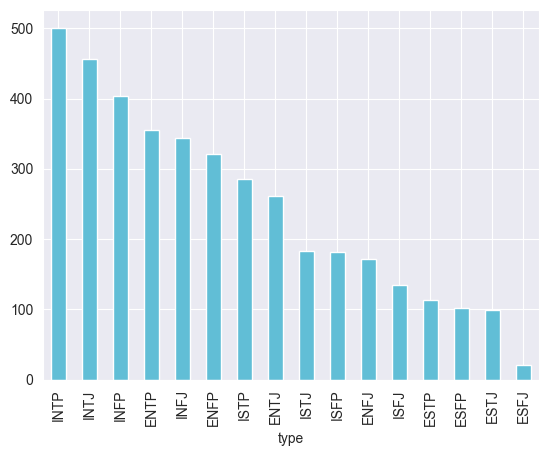

In [8]:
# visually showing the class imbalance
personality_data["type"].value_counts().plot(kind="bar", color="#61BED6")
plt.show()

In [9]:
# to handle the class imbalance better, converting the 16 classes into 4 more balanced classes

personality_data["is_Extrovert"] = personality_data["type"].apply(
    lambda x: 1 if x[0] == "E" else 0
)
personality_data["is_Sensing"] = personality_data["type"].apply(
    lambda x: 1 if x[1] == "S" else 0
)
personality_data["is_Thinking"] = personality_data["type"].apply(
    lambda x: 1 if x[2] == "T" else 0
)
personality_data["is_Judging"] = personality_data["type"].apply(
    lambda x: 1 if x[3] == "J" else 0
)

# rearranging the dataframe columns
personality_data = personality_data[
    ["type", "is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging", "posts"]
]
personality_data.head()

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts
0,INTJ,0,0,1,1,"'Don’t peg your rate low, peg it high. An appe..."
1,INTP,0,0,1,0,'...you get Kid Rock.|||Now it is. Plural: 2sh...
2,INFJ,0,0,0,1,'To me it seems that Stoicism has been reduced...
3,INTP,0,0,1,0,'unBELIEVABLY based...same with physics|||yeah...
4,INTJ,0,0,1,1,"'Tbh, Ne doms are very fun chaotic people that..."


### Note:

* Extroversion vs. Introversion
    * I - 0
    * E - 1 
    
* Sensing vs. Intuition 
    * N - 0 
    * S - 1
    
* Thinking vs. Feeling
    * F - 0
    * T - 1
    
* Judging vs. Perceiving
    * P - 0
    * J - 1 

In [10]:
# checking individual counts
introvert_count = personality_data["is_Extrovert"].value_counts()[0]
extrovert_count = personality_data["is_Extrovert"].value_counts()[1]

intuition_count = personality_data["is_Sensing"].value_counts()[0]
sensing_count = personality_data["is_Sensing"].value_counts()[1]

feeling_count = personality_data["is_Thinking"].value_counts()[0]
thinking_count = personality_data["is_Thinking"].value_counts()[1]

perceiving_count = personality_data["is_Judging"].value_counts()[0]
judging_count = personality_data["is_Judging"].value_counts()[1]

In [11]:
# printing all the counts
print(f"Introvert Count: {introvert_count}")
print(f"Extrovert Count: {extrovert_count}")
print(f"Intuition Count: {intuition_count}")
print(f"Sensing Count: {sensing_count}")
print(f"Feeling Count: {feeling_count}")
print(f"Thinking Count: {thinking_count}")
print(f"Perceiving Count: {perceiving_count}")
print(f"Judging Count: {judging_count}")

Introvert Count: 2488
Extrovert Count: 1445
Intuition Count: 2814
Sensing Count: 1119
Feeling Count: 1678
Thinking Count: 2255
Perceiving Count: 2263
Judging Count: 1670


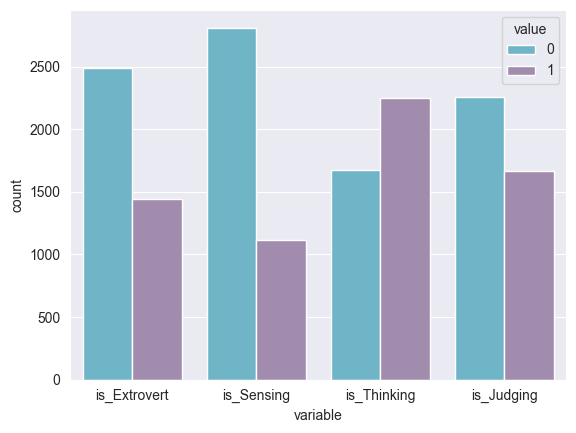

In [12]:
sns.countplot(
    x="variable",
    hue="value",
    data=pd.melt(
        personality_data[["is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging"]]
    ),
    palette=["#61BED6", "#A386B4"],
)

plt.show()

The class imbalance issue still seem to exist but we will proceed with this for now. 

#### Checking for the presence of correlations

In [13]:
corr = personality_data[
    ["is_Extrovert", "is_Sensing", "is_Thinking", "is_Judging"]
].corr()
corr.style.background_gradient(cmap="Blues")

,is_Extrovert,is_Sensing,is_Thinking,is_Judging
is_Extrovert,1.000000,-0.087816,0.001604,-0.064623
is_Sensing,-0.087816,1.000000,0.044912,-0.043485
is_Thinking,0.001604,0.044912,1.000000,0.044201
is_Judging,-0.064623,-0.043485,0.044201,1.000000


There does not seem to be any strong correlation between the four personality dimenions.

### Feature Engineering - I

#### Data Cleaning

In [14]:
# converting posts into lower case
personality_data["clean_posts"] = personality_data["posts"].str.lower()

# replacing ||| with space
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"\|\|\|"), " ", regex=True
)

personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"https?:\/\/(www)?.?([A-Za-z_0-9-]+)([\S])*"), "", regex=True
)

# dropping emails
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"\S+@\S+"), "", regex=True
)

# dropping punctuations
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"[^a-z\s]"), " ", regex=True
)

# dropping MBTIs mentioned in the posts. There are quite a few mention of these types in these posts.
mbti = personality_data["type"].unique()
for type_word in mbti:
    personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
        type_word.lower(), "", regex=True
    )

In [15]:
personality_data.head()

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts
0,INTJ,0,0,1,1,"'Don’t peg your rate low, peg it high. An appe...",don t peg your rate low peg it high an appe...
1,INTP,0,0,1,0,'...you get Kid Rock.|||Now it is. Plural: 2sh...,you get kid rock now it is plural shie...
2,INFJ,0,0,0,1,'To me it seems that Stoicism has been reduced...,to me it seems that stoicism has been reduced...
3,INTP,0,0,1,0,'unBELIEVABLY based...same with physics|||yeah...,unbelievably based same with physics yeah i...
4,INTJ,0,0,1,1,"'Tbh, Ne doms are very fun chaotic people that...",tbh ne doms are very fun chaotic people that...


#### Lemmitizing

* CAUTION - This will take long to run!!

In [16]:
# lemmitizing (excluding stop words in this step)

t = time.time()

lemmatizer = WordNetLemmatizer()

personality_data["clean_posts"] = personality_data["clean_posts"].apply(
    lambda x: " ".join(
        [
            lemmatizer.lemmatize(word)
            for word in x.split(" ")
            if word not in stopwords.words("english")
        ]
    )
)

print(f"Lemmitizing Time: {time.time() - t} seconds")

Lemmitizing Time: 5346.957702159882 seconds


#### Removing words that are 1 to 2 characters long

In [17]:
personality_data["clean_posts"] = personality_data["clean_posts"].str.replace(
    re.compile(r"\b\w{1,2}\b"), "", regex=True
)

In [18]:
# checking the cleaned and lemmitized data
personality_data.head()

,type,is_Extrovert,is_Sensing,is_Thinking,is_Judging,posts,clean_posts
0,INTJ,0,0,1,1,"'Don’t peg your rate low, peg it high. An appe...",peg rate low peg high appeal expertise want...
1,INTP,0,0,1,0,'...you get Kid Rock.|||Now it is. Plural: 2sh...,get kid rock plural shy happened skim ...
2,INFJ,0,0,0,1,'To me it seems that Stoicism has been reduced...,seems stoicism reduced colloquial usage beco...
3,INTP,0,0,1,0,'unBELIEVABLY based...same with physics|||yeah...,unbelievably based physic yeah got material...
4,INTJ,0,0,1,1,"'Tbh, Ne doms are very fun chaotic people that...",tbh doms fun chaotic people talk hour mig...


In [19]:
personality_data.shape

(3933, 7)

In [20]:
# lemmitizing took long. So saving the clean and lemmitized file to save time in further processing.
personality_data.to_csv(os.path.join("..", "data", "clean_data_1.csv"), index=False)